In [5]:
## PRE-PROCESSING

## IMPORTING PACKAGES
import pandas as pd
import numpy as np
import matplotlib
import Project_Library as pl
print('packages imported')


## IMPORTING DATASETS - FROM st1 to st10
for i in range(1, 11):
    globals()[f'df{i}'] = pd.read_csv(f'Data/st{i}.csv', parse_dates=['Date'], index_col='Date')
print('datasets imported')


## CREATING TARGET COLUMN
stocks_list = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
stocks_list = pl.create_target_column(stocks_list)



packages imported
datasets imported
Target columns created for all stocks


In [3]:
## MY TOP 3 STOCK CHOICES ARE: ST9, ST10, ST6.

Optimal Portfolio (Max Sharpe Ratio):
Expected Daily Return: 0.06%
Daily Volatility: 1.48%
Annualized Expected Return: 15.63%
Annualized Volatility: 23.44%
Max Sharpe Ratio: 3.94

Weights:
Stock6:  60.50%
Stock9:  1.15%
Stock10: 38.35%


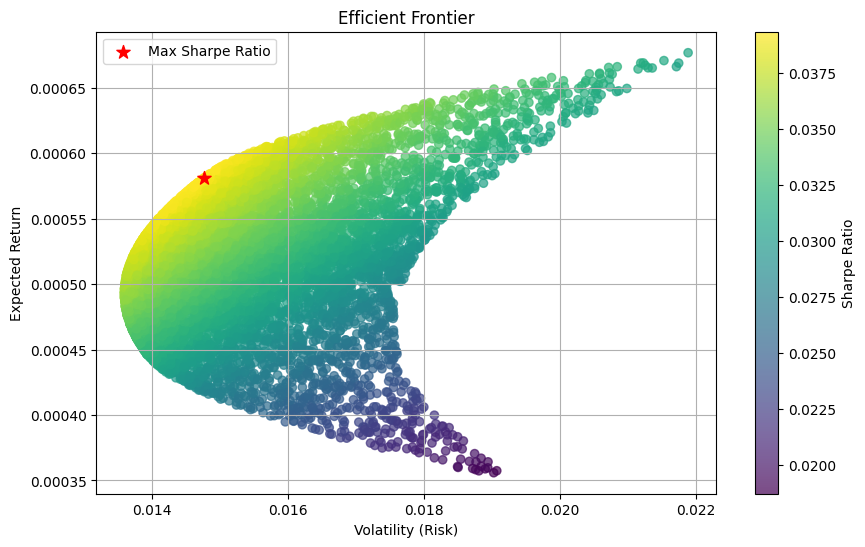

In [6]:
## OPTIMIZING WEIGHTING USING EFFICIENCY FRONTIER (SHARPE RATIO).

# --- RETURNS AND COVARIANCE SETUP (Replace this with your own code if already done) ---
returns = pd.DataFrame({
    "Stock6": df6["Close"].pct_change(),
    "Stock9": df9["Close"].pct_change(),
    "Stock10": df10["Close"].pct_change(),
})
returns = returns.dropna()
returns = returns[returns.index >= "1990-01-01"]

mean_returns = returns.mean().values  # Converting to NumPy array
cov_matrix = returns.cov().values     # Converting to NumPy array

# --- PORTFOLIO SIMULATION ---
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(3)
    weights /= np.sum(weights)
    weights_record.append(weights)

    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = portfolio_return / portfolio_volatility

    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = sharpe_ratio

# --- RESULTS ---
results_df = pd.DataFrame(results.T, columns=["Return", "Volatility", "Sharpe Ratio"])

max_sharpe_idx = results_df["Sharpe Ratio"].idxmax()
optimal_weights = weights_record[max_sharpe_idx]

# --- RESULT ---
print("Optimal Portfolio (Max Sharpe Ratio):")
expected_daily_return = results_df.loc[max_sharpe_idx, 'Return']
expected_daily_volatility = results_df.loc[max_sharpe_idx, 'Volatility']

# Annualize the return and volatility
annual_return = (1 + expected_daily_return) ** 250 - 1
annual_volatility = expected_daily_volatility * np.sqrt(252)

print(f"Expected Daily Return: {expected_daily_return:.2%}")
print(f"Daily Volatility: {expected_daily_volatility:.2%}")
print(f"Annualized Expected Return: {annual_return:.2%}")
print(f"Annualized Volatility: {annual_volatility:.2%}")
print(f"Max Sharpe Ratio: {round(results_df.loc[max_sharpe_idx, 'Sharpe Ratio']*100,2)}")
print('')
print("Weights:")
print(f"Stock6:  {optimal_weights[0]:.2%}")
print(f"Stock9:  {optimal_weights[1]:.2%}")
print(f"Stock10: {optimal_weights[2]:.2%}")


# --- PLOT ---
plt.figure(figsize=(10, 6))
plt.scatter(results_df["Volatility"], results_df["Return"], c=results_df["Sharpe Ratio"], cmap="viridis", alpha=0.7)
plt.colorbar(label="Sharpe Ratio")
plt.scatter(results_df.loc[max_sharpe_idx, "Volatility"],
            results_df.loc[max_sharpe_idx, "Return"],
            color="red", marker="*", s=100, label="Max Sharpe Ratio")
plt.xlabel("Volatility (Risk)")
plt.ylabel("Expected Return")
plt.title("Efficient Frontier")
plt.legend()
plt.grid(True)
plt.show()
